In [37]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [38]:
# learning parameters
batch_size = 512
epochs = 200
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [39]:
print(device)

cpu


# Prepare training dataset

In [40]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [41]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [42]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [43]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [44]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [45]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [46]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [47]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)*0.9
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.ones(size, 1)*0
    return data.to(device)


In [48]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [49]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [50]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

  0%|          | 0/117 [00:00<?, ?it/s]

118it [00:20,  5.70it/s]                         


Epoch 1 of 200
Generator loss: 1.67670178, Discriminator loss: 0.45322174


118it [00:20,  5.79it/s]                         


Epoch 2 of 200
Generator loss: 1.70694816, Discriminator loss: 0.68491095


118it [00:19,  6.17it/s]                         


Epoch 3 of 200
Generator loss: 5.57603168, Discriminator loss: 0.30678833


118it [00:18,  6.37it/s]                         


Epoch 4 of 200
Generator loss: 5.91666412, Discriminator loss: 0.25927702


118it [00:18,  6.45it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


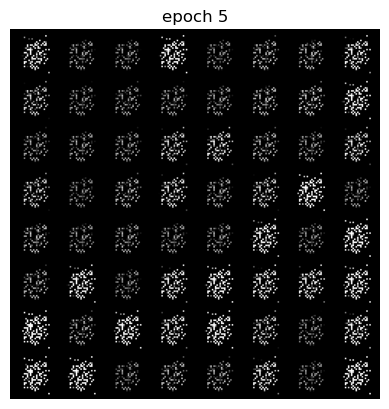

Epoch 5 of 200
Generator loss: 6.86753178, Discriminator loss: 0.27681732


118it [00:23,  5.02it/s]                         


Epoch 6 of 200
Generator loss: 4.49256849, Discriminator loss: 0.43075311


118it [00:20,  5.73it/s]                         


Epoch 7 of 200
Generator loss: 3.59606123, Discriminator loss: 0.50000310


118it [00:20,  5.88it/s]                         


Epoch 8 of 200
Generator loss: 3.16196847, Discriminator loss: 0.45384920


118it [00:20,  5.79it/s]                         


Epoch 9 of 200
Generator loss: 3.24229479, Discriminator loss: 0.54811096


118it [00:20,  5.70it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


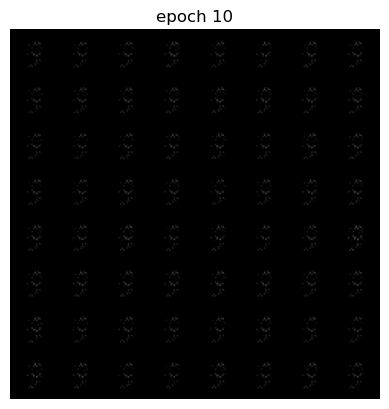

Epoch 10 of 200
Generator loss: 2.63555026, Discriminator loss: 0.49937916


118it [00:24,  4.77it/s]                         


Epoch 11 of 200
Generator loss: 1.62639165, Discriminator loss: 0.51188493


118it [00:25,  4.68it/s]                         


Epoch 12 of 200
Generator loss: 1.95787466, Discriminator loss: 0.52858603


118it [00:23,  4.93it/s]                         


Epoch 13 of 200
Generator loss: 2.66922736, Discriminator loss: 0.49059439


118it [00:22,  5.26it/s]                         


Epoch 14 of 200
Generator loss: 2.24520373, Discriminator loss: 0.50185764


118it [00:26,  4.42it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


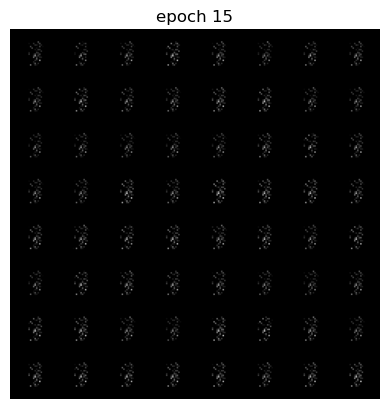

Epoch 15 of 200
Generator loss: 2.64345169, Discriminator loss: 0.41464025


118it [00:22,  5.24it/s]                         


Epoch 16 of 200
Generator loss: 2.03489923, Discriminator loss: 0.57666975


118it [00:20,  5.86it/s]                         


Epoch 17 of 200
Generator loss: 1.75252378, Discriminator loss: 0.49300635


118it [00:22,  5.30it/s]                         


Epoch 18 of 200
Generator loss: 2.25089455, Discriminator loss: 0.44710585


118it [00:21,  5.48it/s]                         


Epoch 19 of 200
Generator loss: 1.80354309, Discriminator loss: 0.52493256


118it [00:21,  5.52it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


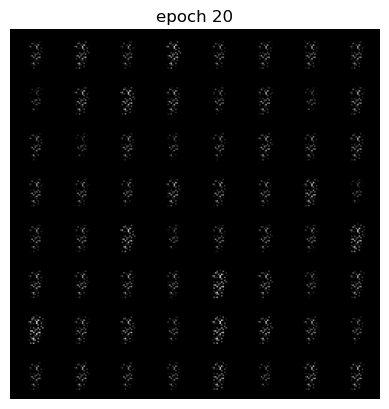

Epoch 20 of 200
Generator loss: 1.70022023, Discriminator loss: 0.56956702


118it [00:21,  5.50it/s]                         


Epoch 21 of 200
Generator loss: 1.70950377, Discriminator loss: 0.51521194


118it [00:21,  5.58it/s]                         


Epoch 22 of 200
Generator loss: 2.40439010, Discriminator loss: 0.50454754


118it [00:20,  5.66it/s]                         


Epoch 23 of 200
Generator loss: 1.82938480, Discriminator loss: 0.47872505


118it [00:21,  5.52it/s]                         


Epoch 24 of 200
Generator loss: 1.99133050, Discriminator loss: 0.41339821


118it [00:21,  5.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


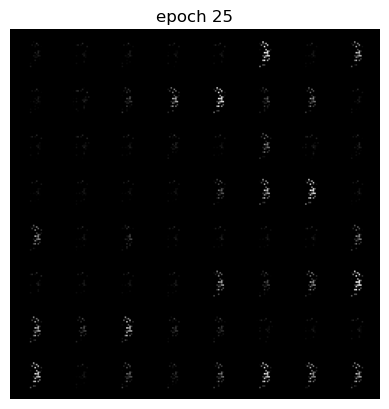

Epoch 25 of 200
Generator loss: 2.70460773, Discriminator loss: 0.33664483


118it [00:20,  5.72it/s]                         


Epoch 26 of 200
Generator loss: 2.81024504, Discriminator loss: 0.34429541


118it [00:20,  5.87it/s]                         


Epoch 27 of 200
Generator loss: 3.43320990, Discriminator loss: 0.32292646


118it [00:19,  6.01it/s]                         


Epoch 28 of 200
Generator loss: 3.51506567, Discriminator loss: 0.30425119


118it [00:20,  5.87it/s]                         


Epoch 29 of 200
Generator loss: 3.67385578, Discriminator loss: 0.31820020


118it [00:19,  6.18it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


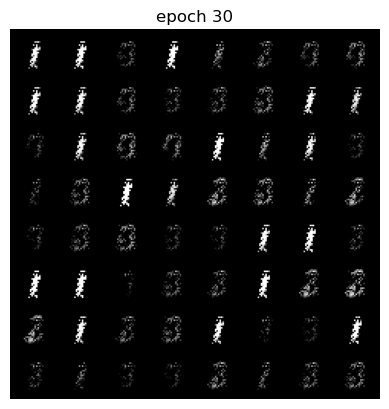

Epoch 30 of 200
Generator loss: 3.76823354, Discriminator loss: 0.31498411


118it [00:19,  6.18it/s]                         


Epoch 31 of 200
Generator loss: 3.80091882, Discriminator loss: 0.30727816


118it [00:20,  5.75it/s]                         


Epoch 32 of 200
Generator loss: 4.11295176, Discriminator loss: 0.31433138


118it [00:20,  5.68it/s]                         


Epoch 33 of 200
Generator loss: 3.93361306, Discriminator loss: 0.31512144


118it [00:20,  5.76it/s]                         


Epoch 34 of 200
Generator loss: 3.30214810, Discriminator loss: 0.35313612


118it [00:22,  5.35it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


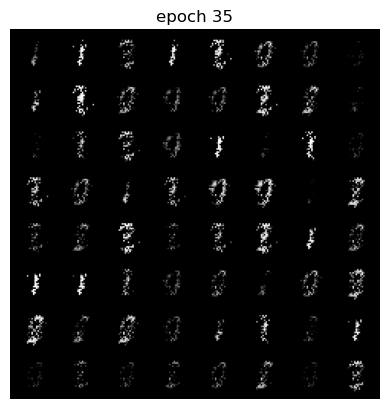

Epoch 35 of 200
Generator loss: 3.18481946, Discriminator loss: 0.38460740


118it [00:22,  5.31it/s]                         


Epoch 36 of 200
Generator loss: 3.17757297, Discriminator loss: 0.42956164


118it [00:22,  5.35it/s]                         


Epoch 37 of 200
Generator loss: 2.93225336, Discriminator loss: 0.37302652


118it [00:21,  5.43it/s]                         


Epoch 38 of 200
Generator loss: 3.22986674, Discriminator loss: 0.32771051


118it [00:20,  5.65it/s]                         


Epoch 39 of 200
Generator loss: 3.16087270, Discriminator loss: 0.34918359


118it [00:21,  5.60it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


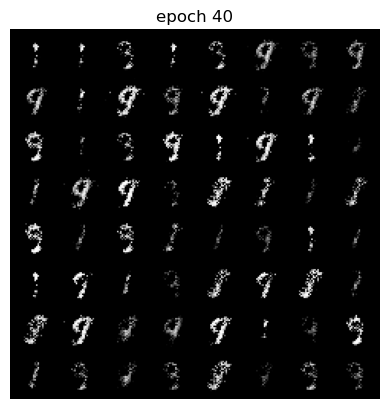

Epoch 40 of 200
Generator loss: 3.13752437, Discriminator loss: 0.37265679


118it [00:23,  5.01it/s]                         


Epoch 41 of 200
Generator loss: 2.92199230, Discriminator loss: 0.41198462


118it [00:23,  5.02it/s]                         


Epoch 42 of 200
Generator loss: 2.92628384, Discriminator loss: 0.36598971


118it [00:21,  5.40it/s]                         


Epoch 43 of 200
Generator loss: 2.60247040, Discriminator loss: 0.42060605


118it [00:22,  5.21it/s]                         


Epoch 44 of 200
Generator loss: 2.40657020, Discriminator loss: 0.41000259


118it [00:21,  5.55it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


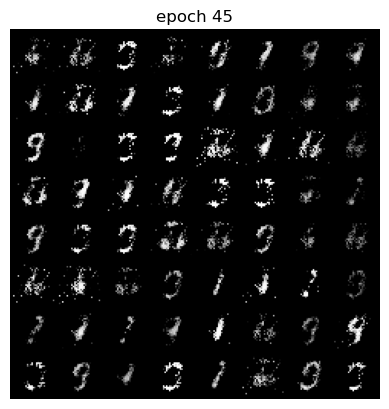

Epoch 45 of 200
Generator loss: 2.64787316, Discriminator loss: 0.39000890


118it [00:20,  5.73it/s]                         


Epoch 46 of 200
Generator loss: 2.77948284, Discriminator loss: 0.38117361


118it [00:24,  4.90it/s]                         


Epoch 47 of 200
Generator loss: 3.13546085, Discriminator loss: 0.37963289


118it [00:20,  5.75it/s]                         


Epoch 48 of 200
Generator loss: 2.94737124, Discriminator loss: 0.36751211


118it [00:19,  5.91it/s]                         


Epoch 49 of 200
Generator loss: 2.60503483, Discriminator loss: 0.38620847


118it [00:20,  5.62it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


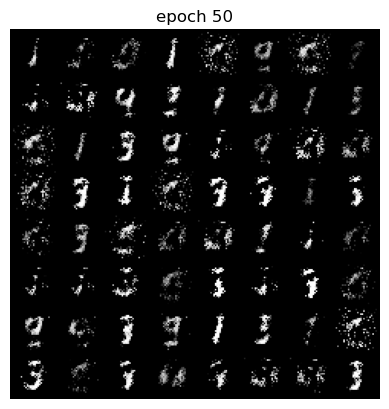

Epoch 50 of 200
Generator loss: 2.64105272, Discriminator loss: 0.38674891


118it [00:19,  6.01it/s]                         


Epoch 51 of 200
Generator loss: 2.53600526, Discriminator loss: 0.41373363


118it [00:23,  5.10it/s]                         


Epoch 52 of 200
Generator loss: 2.66826129, Discriminator loss: 0.36304322


118it [00:21,  5.45it/s]                         


Epoch 53 of 200
Generator loss: 2.63685727, Discriminator loss: 0.38273451


118it [00:23,  5.12it/s]                         


Epoch 54 of 200
Generator loss: 2.78801608, Discriminator loss: 0.39871067


118it [00:22,  5.36it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


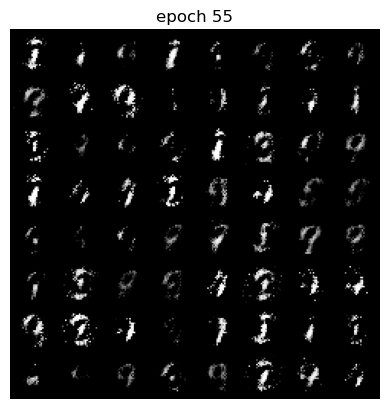

Epoch 55 of 200
Generator loss: 2.60983729, Discriminator loss: 0.38268164


118it [00:24,  4.72it/s]                         


Epoch 56 of 200
Generator loss: 2.59882712, Discriminator loss: 0.42250279


118it [00:25,  4.68it/s]                         


Epoch 57 of 200
Generator loss: 2.70665598, Discriminator loss: 0.41171810


118it [00:24,  4.78it/s]                         


Epoch 58 of 200
Generator loss: 2.58215618, Discriminator loss: 0.41771594


118it [00:22,  5.15it/s]                         


Epoch 59 of 200
Generator loss: 2.39208364, Discriminator loss: 0.41240901


118it [00:20,  5.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


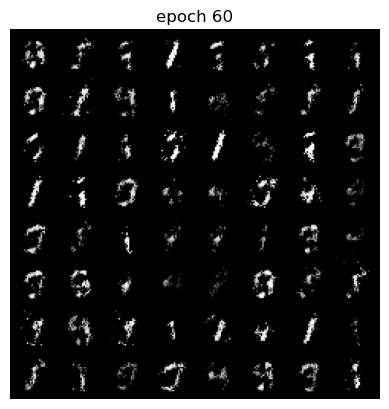

Epoch 60 of 200
Generator loss: 2.38265181, Discriminator loss: 0.42059097


118it [00:20,  5.66it/s]                         


Epoch 61 of 200
Generator loss: 2.41551852, Discriminator loss: 0.42646220


118it [00:22,  5.34it/s]                         


Epoch 62 of 200
Generator loss: 2.15336871, Discriminator loss: 0.44037354


118it [00:24,  4.81it/s]                         


Epoch 63 of 200
Generator loss: 2.17442918, Discriminator loss: 0.43599388


118it [00:21,  5.38it/s]                         


Epoch 64 of 200
Generator loss: 2.38207483, Discriminator loss: 0.41880727


118it [00:22,  5.30it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


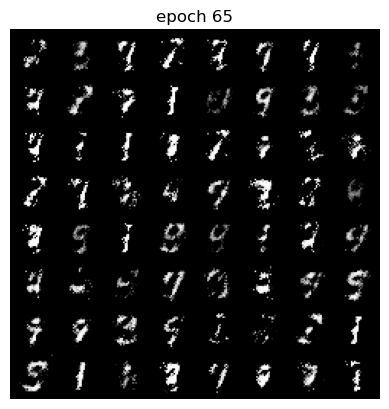

Epoch 65 of 200
Generator loss: 2.31375742, Discriminator loss: 0.40918109


118it [00:22,  5.27it/s]                         


Epoch 66 of 200
Generator loss: 2.43093657, Discriminator loss: 0.41543722


118it [00:22,  5.34it/s]                         


Epoch 67 of 200
Generator loss: 2.31761408, Discriminator loss: 0.44415829


118it [00:21,  5.44it/s]                         


Epoch 68 of 200
Generator loss: 1.95888495, Discriminator loss: 0.45845029


118it [00:22,  5.30it/s]                         


Epoch 69 of 200
Generator loss: 2.19346929, Discriminator loss: 0.44738367


118it [00:22,  5.36it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


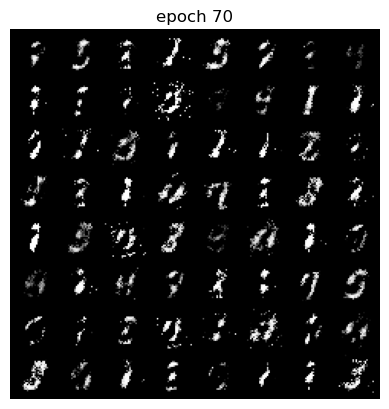

Epoch 70 of 200
Generator loss: 2.45062447, Discriminator loss: 0.42088318


118it [00:21,  5.42it/s]                         


Epoch 71 of 200
Generator loss: 2.33419681, Discriminator loss: 0.41792750


118it [00:21,  5.38it/s]                         


Epoch 72 of 200
Generator loss: 2.21883893, Discriminator loss: 0.44781551


118it [00:21,  5.38it/s]                         


Epoch 73 of 200
Generator loss: 2.27349615, Discriminator loss: 0.42505059


118it [00:24,  4.74it/s]                         


Epoch 74 of 200
Generator loss: 2.25980520, Discriminator loss: 0.43993890


118it [00:25,  4.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


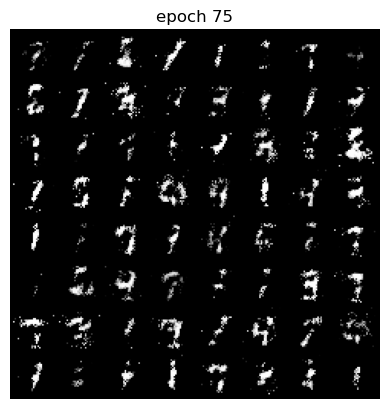

Epoch 75 of 200
Generator loss: 2.14924026, Discriminator loss: 0.43981144


118it [00:23,  5.02it/s]                         


Epoch 76 of 200
Generator loss: 2.02042794, Discriminator loss: 0.47136715


118it [00:26,  4.40it/s]                         


Epoch 77 of 200
Generator loss: 2.02151108, Discriminator loss: 0.46214607


118it [00:26,  4.44it/s]                         


Epoch 78 of 200
Generator loss: 1.93989563, Discriminator loss: 0.45499697


118it [00:26,  4.43it/s]                         


Epoch 79 of 200
Generator loss: 1.92566013, Discriminator loss: 0.49520186


118it [00:27,  4.34it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


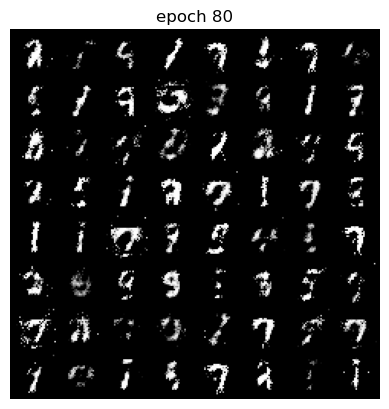

Epoch 80 of 200
Generator loss: 1.93321860, Discriminator loss: 0.48381642


118it [00:21,  5.40it/s]                         


Epoch 81 of 200
Generator loss: 1.93869615, Discriminator loss: 0.46022597


118it [00:21,  5.38it/s]                         


Epoch 82 of 200
Generator loss: 1.89152467, Discriminator loss: 0.47174859


118it [00:22,  5.15it/s]                         


Epoch 83 of 200
Generator loss: 1.94997990, Discriminator loss: 0.48138958


118it [00:23,  4.97it/s]                         


Epoch 84 of 200
Generator loss: 1.88908350, Discriminator loss: 0.46615654


118it [00:23,  4.92it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


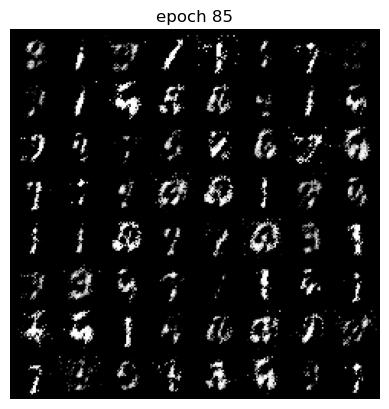

Epoch 85 of 200
Generator loss: 1.95212924, Discriminator loss: 0.47257549


118it [00:23,  5.11it/s]                         


Epoch 86 of 200
Generator loss: 1.90193725, Discriminator loss: 0.46886089


118it [00:24,  4.84it/s]                         


Epoch 87 of 200
Generator loss: 1.89205897, Discriminator loss: 0.47678387


118it [00:25,  4.61it/s]                         


Epoch 88 of 200
Generator loss: 2.01708198, Discriminator loss: 0.47008997


118it [00:27,  4.23it/s]                         


Epoch 89 of 200
Generator loss: 1.97691286, Discriminator loss: 0.45257500


118it [00:23,  5.03it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


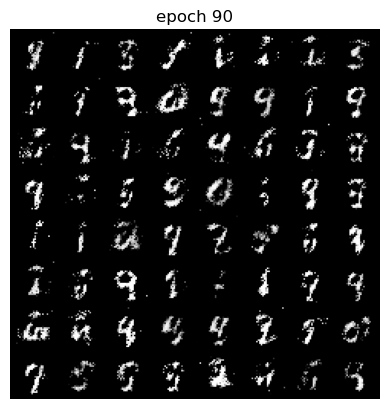

Epoch 90 of 200
Generator loss: 1.99546385, Discriminator loss: 0.46856648


118it [00:21,  5.39it/s]                         


Epoch 91 of 200
Generator loss: 1.91982031, Discriminator loss: 0.49148419


118it [00:21,  5.39it/s]                         


Epoch 92 of 200
Generator loss: 1.97701335, Discriminator loss: 0.45705938


118it [00:24,  4.88it/s]                         


Epoch 93 of 200
Generator loss: 2.08186984, Discriminator loss: 0.44832551


118it [00:25,  4.64it/s]                         


Epoch 94 of 200
Generator loss: 2.10363793, Discriminator loss: 0.45724967


118it [00:25,  4.57it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


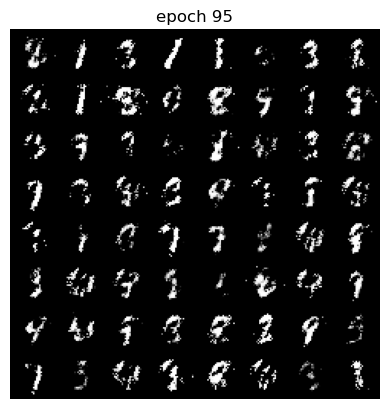

Epoch 95 of 200
Generator loss: 2.09031320, Discriminator loss: 0.47322962


118it [00:25,  4.67it/s]                         


Epoch 96 of 200
Generator loss: 2.12376976, Discriminator loss: 0.44800946


118it [00:23,  4.93it/s]                         


Epoch 97 of 200
Generator loss: 2.11942697, Discriminator loss: 0.44868976


118it [00:24,  4.77it/s]                         


Epoch 98 of 200
Generator loss: 2.16231608, Discriminator loss: 0.44236922


118it [00:28,  4.20it/s]                         


Epoch 99 of 200
Generator loss: 2.24480605, Discriminator loss: 0.44487718


118it [00:27,  4.24it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


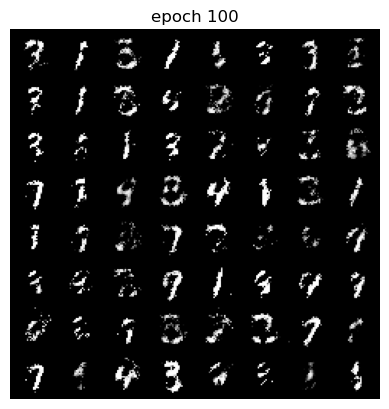

Epoch 100 of 200
Generator loss: 2.18952155, Discriminator loss: 0.44004568


118it [00:27,  4.34it/s]                         


Epoch 101 of 200
Generator loss: 2.20334458, Discriminator loss: 0.43525249


118it [00:23,  5.03it/s]                         


Epoch 102 of 200
Generator loss: 2.29786825, Discriminator loss: 0.43679258


118it [00:25,  4.61it/s]                         


Epoch 103 of 200
Generator loss: 2.04891062, Discriminator loss: 0.46341383


118it [00:26,  4.51it/s]                         


Epoch 104 of 200
Generator loss: 2.00726271, Discriminator loss: 0.45233482


118it [00:27,  4.29it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


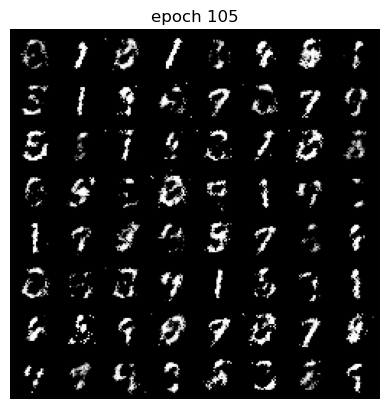

Epoch 105 of 200
Generator loss: 2.09953332, Discriminator loss: 0.45641881


118it [00:25,  4.60it/s]                         


Epoch 106 of 200
Generator loss: 2.17367482, Discriminator loss: 0.44661602


118it [00:25,  4.70it/s]                         


Epoch 107 of 200
Generator loss: 2.15150952, Discriminator loss: 0.45087141


118it [00:22,  5.21it/s]                         


Epoch 108 of 200
Generator loss: 1.93288803, Discriminator loss: 0.46201366


118it [00:26,  4.47it/s]                         


Epoch 109 of 200
Generator loss: 1.95227075, Discriminator loss: 0.46516421


118it [00:25,  4.68it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


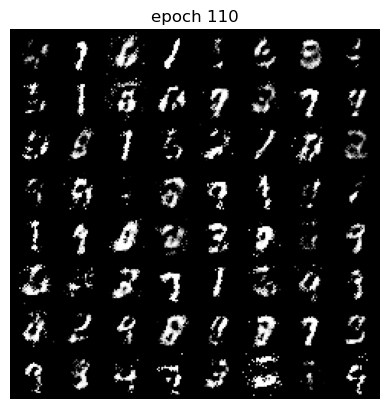

Epoch 110 of 200
Generator loss: 1.93511713, Discriminator loss: 0.47188127


118it [00:25,  4.63it/s]                         


Epoch 111 of 200
Generator loss: 1.85399687, Discriminator loss: 0.48493889


118it [00:26,  4.53it/s]                         


Epoch 112 of 200
Generator loss: 1.79043698, Discriminator loss: 0.49839920


118it [00:28,  4.08it/s]                         


Epoch 113 of 200
Generator loss: 1.79821479, Discriminator loss: 0.49392200


118it [00:23,  4.92it/s]                         


Epoch 114 of 200
Generator loss: 1.80760324, Discriminator loss: 0.47964951


118it [00:24,  4.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


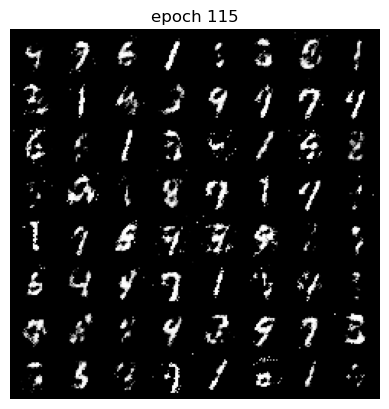

Epoch 115 of 200
Generator loss: 1.69132483, Discriminator loss: 0.49837604


118it [00:24,  4.72it/s]                         


Epoch 116 of 200
Generator loss: 1.69460809, Discriminator loss: 0.49962205


118it [00:25,  4.56it/s]                         


Epoch 117 of 200
Generator loss: 1.76556849, Discriminator loss: 0.50061017


118it [00:26,  4.51it/s]                         


Epoch 118 of 200
Generator loss: 1.72694623, Discriminator loss: 0.50317734


118it [00:25,  4.64it/s]                         


Epoch 119 of 200
Generator loss: 1.82530344, Discriminator loss: 0.48698092


118it [00:25,  4.68it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


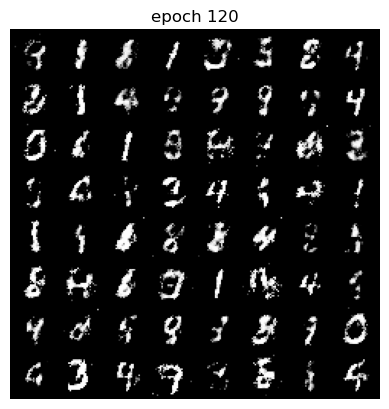

Epoch 120 of 200
Generator loss: 1.75553453, Discriminator loss: 0.51126349


118it [00:26,  4.43it/s]                         


Epoch 121 of 200
Generator loss: 1.71193409, Discriminator loss: 0.50517422


118it [00:30,  3.85it/s]                         


Epoch 122 of 200
Generator loss: 1.71999764, Discriminator loss: 0.49148390


118it [00:32,  3.64it/s]                         


Epoch 123 of 200
Generator loss: 1.76973057, Discriminator loss: 0.48510072


118it [00:34,  3.43it/s]                         


Epoch 124 of 200
Generator loss: 1.72256982, Discriminator loss: 0.50209492


118it [00:24,  4.92it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


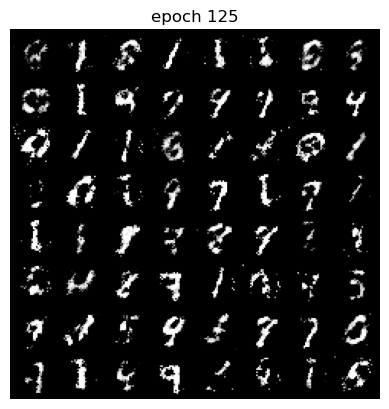

Epoch 125 of 200
Generator loss: 1.66385901, Discriminator loss: 0.50677156


118it [00:22,  5.33it/s]                         


Epoch 126 of 200
Generator loss: 1.73229301, Discriminator loss: 0.48788348


118it [00:21,  5.38it/s]                         


Epoch 127 of 200
Generator loss: 1.71310472, Discriminator loss: 0.50578147


118it [00:29,  3.99it/s]                         


Epoch 128 of 200
Generator loss: 1.65227401, Discriminator loss: 0.50513577


118it [00:36,  3.24it/s]                         


Epoch 129 of 200
Generator loss: 1.81365228, Discriminator loss: 0.50525862


118it [00:26,  4.39it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


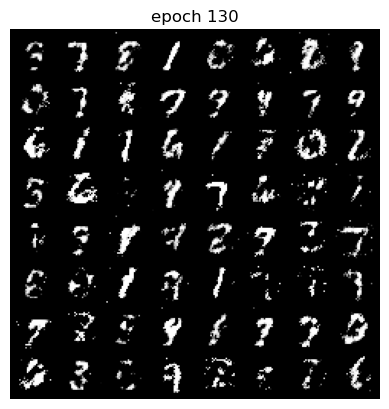

Epoch 130 of 200
Generator loss: 1.63325083, Discriminator loss: 0.52406704


118it [00:23,  5.05it/s]                         


Epoch 131 of 200
Generator loss: 1.72671247, Discriminator loss: 0.49335027


118it [00:23,  5.09it/s]                         


Epoch 132 of 200
Generator loss: 1.81588495, Discriminator loss: 0.49119774


118it [00:24,  4.77it/s]                         


Epoch 133 of 200
Generator loss: 1.75070024, Discriminator loss: 0.49856696


118it [00:27,  4.25it/s]                         


Epoch 134 of 200
Generator loss: 1.86803067, Discriminator loss: 0.49033299


118it [00:25,  4.57it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


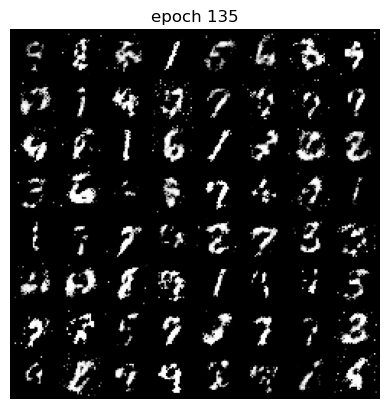

Epoch 135 of 200
Generator loss: 1.68748081, Discriminator loss: 0.50324887


118it [00:23,  4.92it/s]                         


Epoch 136 of 200
Generator loss: 1.63965011, Discriminator loss: 0.50891262


118it [00:23,  4.99it/s]                         


Epoch 137 of 200
Generator loss: 1.68436944, Discriminator loss: 0.51026094


118it [00:21,  5.61it/s]                         


Epoch 138 of 200
Generator loss: 1.62500727, Discriminator loss: 0.52363878


118it [00:23,  5.04it/s]                         


Epoch 139 of 200
Generator loss: 1.65674341, Discriminator loss: 0.51230556


118it [00:22,  5.30it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


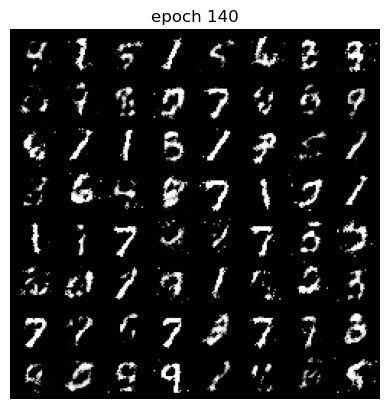

Epoch 140 of 200
Generator loss: 1.57276320, Discriminator loss: 0.52999771


118it [00:22,  5.18it/s]                         


Epoch 141 of 200
Generator loss: 1.64616513, Discriminator loss: 0.50981677


118it [00:23,  5.09it/s]                         


Epoch 142 of 200
Generator loss: 1.66059029, Discriminator loss: 0.52525097


118it [00:24,  4.88it/s]                         


Epoch 143 of 200
Generator loss: 1.55483651, Discriminator loss: 0.52209562


118it [00:24,  4.76it/s]                         


Epoch 144 of 200
Generator loss: 1.67809486, Discriminator loss: 0.50247490


118it [00:23,  5.07it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


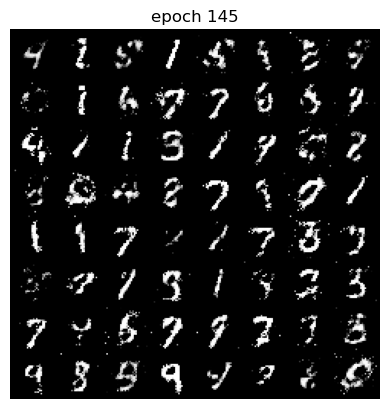

Epoch 145 of 200
Generator loss: 1.72152114, Discriminator loss: 0.50830108


118it [00:22,  5.27it/s]                         


Epoch 146 of 200
Generator loss: 1.61984241, Discriminator loss: 0.52257764


118it [00:21,  5.37it/s]                         


Epoch 147 of 200
Generator loss: 1.57936978, Discriminator loss: 0.52897722


118it [00:21,  5.50it/s]                         


Epoch 148 of 200
Generator loss: 1.57735395, Discriminator loss: 0.52005202


118it [00:21,  5.52it/s]                         


Epoch 149 of 200
Generator loss: 1.54282391, Discriminator loss: 0.53335357


118it [00:21,  5.39it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


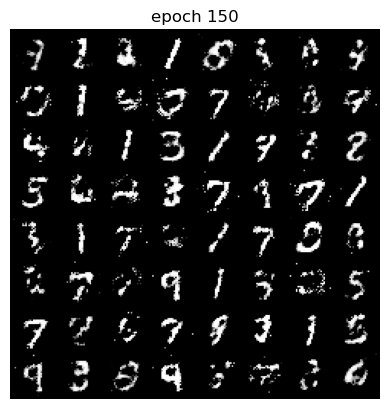

Epoch 150 of 200
Generator loss: 1.55155110, Discriminator loss: 0.53135824


118it [00:21,  5.43it/s]                         


Epoch 151 of 200
Generator loss: 1.55078721, Discriminator loss: 0.52609986


118it [00:21,  5.54it/s]                         


Epoch 152 of 200
Generator loss: 1.56742620, Discriminator loss: 0.52164859


118it [00:21,  5.48it/s]                         


Epoch 153 of 200
Generator loss: 1.66080880, Discriminator loss: 0.51673561


118it [00:21,  5.45it/s]                         


Epoch 154 of 200
Generator loss: 1.63684821, Discriminator loss: 0.51641619


118it [00:21,  5.53it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


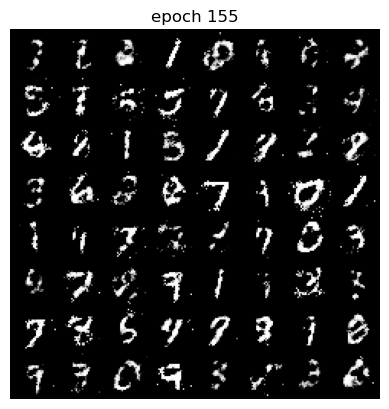

Epoch 155 of 200
Generator loss: 1.67922688, Discriminator loss: 0.51167679


118it [00:22,  5.31it/s]                         


Epoch 156 of 200
Generator loss: 1.56325936, Discriminator loss: 0.53367871


118it [00:21,  5.44it/s]                         


Epoch 157 of 200
Generator loss: 1.54672873, Discriminator loss: 0.53097093


118it [00:21,  5.50it/s]                         


Epoch 158 of 200
Generator loss: 1.61982501, Discriminator loss: 0.52689809


118it [00:21,  5.60it/s]                         


Epoch 159 of 200
Generator loss: 1.64075768, Discriminator loss: 0.52266723


118it [00:23,  5.11it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


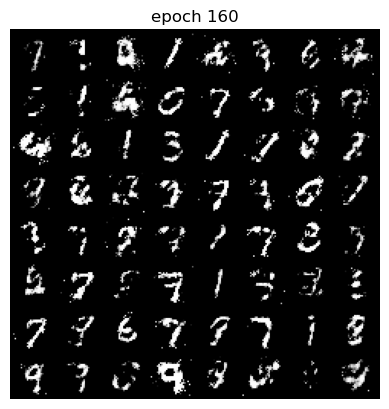

Epoch 160 of 200
Generator loss: 1.51815128, Discriminator loss: 0.53206080


118it [00:25,  4.70it/s]                         


Epoch 161 of 200
Generator loss: 1.64935267, Discriminator loss: 0.51510596


118it [00:21,  5.43it/s]                         


Epoch 162 of 200
Generator loss: 1.56431985, Discriminator loss: 0.53043598


118it [00:20,  5.64it/s]                         


Epoch 163 of 200
Generator loss: 1.55244970, Discriminator loss: 0.52367312


118it [00:21,  5.47it/s]                         


Epoch 164 of 200
Generator loss: 1.56857395, Discriminator loss: 0.52670163


118it [00:21,  5.48it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


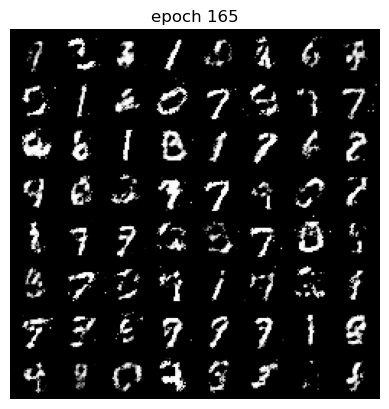

Epoch 165 of 200
Generator loss: 1.57265306, Discriminator loss: 0.53438032


118it [00:22,  5.36it/s]                         


Epoch 166 of 200
Generator loss: 1.55971074, Discriminator loss: 0.52231616


118it [00:21,  5.42it/s]                         


Epoch 167 of 200
Generator loss: 1.60341382, Discriminator loss: 0.51779628


118it [00:25,  4.65it/s]                         


Epoch 168 of 200
Generator loss: 1.58974922, Discriminator loss: 0.52416950


118it [00:23,  4.95it/s]                         


Epoch 169 of 200
Generator loss: 1.54776239, Discriminator loss: 0.54336786


118it [00:20,  5.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


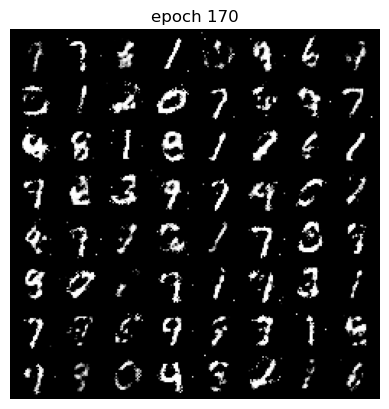

Epoch 170 of 200
Generator loss: 1.55346453, Discriminator loss: 0.53156257


118it [00:21,  5.60it/s]                         


Epoch 171 of 200
Generator loss: 1.54270768, Discriminator loss: 0.53376228


118it [00:21,  5.43it/s]                         


Epoch 172 of 200
Generator loss: 1.55161536, Discriminator loss: 0.52552605


118it [00:20,  5.68it/s]                         


Epoch 173 of 200
Generator loss: 1.46085155, Discriminator loss: 0.54013115


118it [00:21,  5.59it/s]                         


Epoch 174 of 200
Generator loss: 1.52783430, Discriminator loss: 0.53519869


118it [00:21,  5.41it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


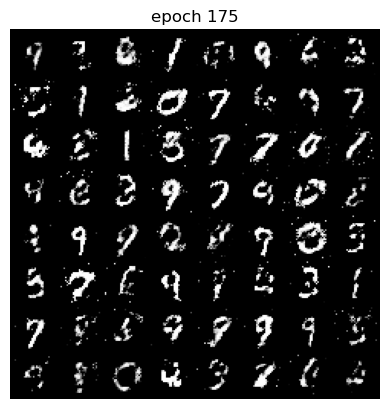

Epoch 175 of 200
Generator loss: 1.45619869, Discriminator loss: 0.54583317


118it [00:20,  5.63it/s]                         


Epoch 176 of 200
Generator loss: 1.37546074, Discriminator loss: 0.55346143


118it [00:21,  5.51it/s]                         


Epoch 177 of 200
Generator loss: 1.47849011, Discriminator loss: 0.53849298


118it [00:23,  4.99it/s]                         


Epoch 178 of 200
Generator loss: 1.51518822, Discriminator loss: 0.54063582


118it [00:23,  5.00it/s]                         


Epoch 179 of 200
Generator loss: 1.44232261, Discriminator loss: 0.54993731


118it [00:22,  5.20it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


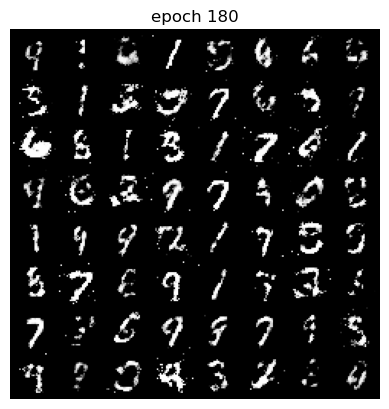

Epoch 180 of 200
Generator loss: 1.49375188, Discriminator loss: 0.54184276


118it [00:21,  5.44it/s]                         


Epoch 181 of 200
Generator loss: 1.49346673, Discriminator loss: 0.53790671


118it [00:22,  5.33it/s]                         


Epoch 182 of 200
Generator loss: 1.54277289, Discriminator loss: 0.52661818


118it [00:24,  4.88it/s]                         


Epoch 183 of 200
Generator loss: 1.57991004, Discriminator loss: 0.53034699


118it [00:21,  5.37it/s]                         


Epoch 184 of 200
Generator loss: 1.52858579, Discriminator loss: 0.54491568


118it [00:24,  4.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


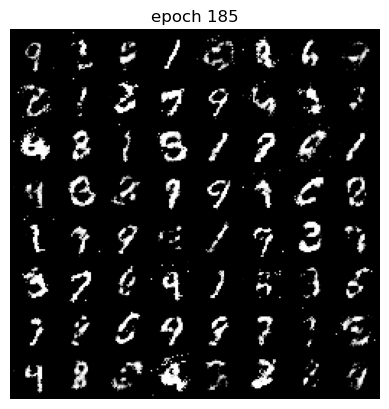

Epoch 185 of 200
Generator loss: 1.58540165, Discriminator loss: 0.52716213


118it [00:21,  5.54it/s]                         


Epoch 186 of 200
Generator loss: 1.56803644, Discriminator loss: 0.52502227


118it [00:21,  5.39it/s]                         


Epoch 187 of 200
Generator loss: 1.53748679, Discriminator loss: 0.53467399


118it [00:21,  5.43it/s]                         


Epoch 188 of 200
Generator loss: 1.46388495, Discriminator loss: 0.54042083


118it [00:23,  4.94it/s]                         


Epoch 189 of 200
Generator loss: 1.47004879, Discriminator loss: 0.54511821


118it [00:21,  5.57it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


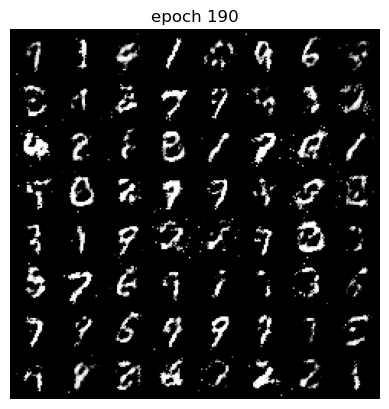

Epoch 190 of 200
Generator loss: 1.47013307, Discriminator loss: 0.54717022


118it [00:22,  5.22it/s]                         


Epoch 191 of 200
Generator loss: 1.48334432, Discriminator loss: 0.54139793


118it [00:23,  5.06it/s]                         


Epoch 192 of 200
Generator loss: 1.49128973, Discriminator loss: 0.53660017


118it [00:22,  5.20it/s]                         


Epoch 193 of 200
Generator loss: 1.47573388, Discriminator loss: 0.53738976


118it [00:23,  4.97it/s]                         


Epoch 194 of 200
Generator loss: 1.50052190, Discriminator loss: 0.54100531


118it [00:22,  5.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


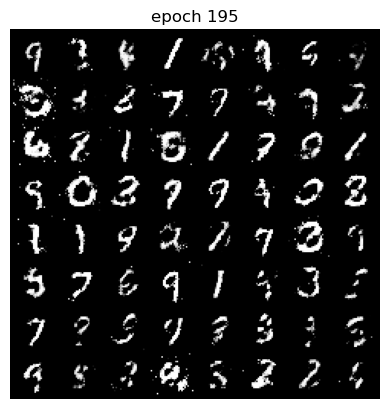

Epoch 195 of 200
Generator loss: 1.37687099, Discriminator loss: 0.55795926


118it [00:22,  5.22it/s]                         


Epoch 196 of 200
Generator loss: 1.48239362, Discriminator loss: 0.53996372


118it [00:23,  4.95it/s]                         


Epoch 197 of 200
Generator loss: 1.43877113, Discriminator loss: 0.55206293


118it [00:23,  4.96it/s]                         


Epoch 198 of 200
Generator loss: 1.48179352, Discriminator loss: 0.53869486


118it [00:23,  5.05it/s]                         


Epoch 199 of 200
Generator loss: 1.47753406, Discriminator loss: 0.54720443


118it [00:21,  5.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


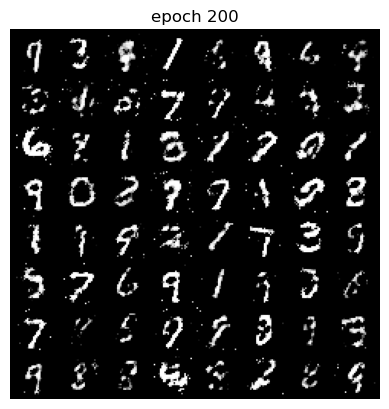

Epoch 200 of 200
Generator loss: 1.38787472, Discriminator loss: 0.55005831


In [51]:
torch.manual_seed(7777)

def generator_loss(fake_images):
    local_size = len(fake_images)
    real_label = label_real(local_size)
    optim_g.zero_grad()
    fake_output = discriminator(fake_images)
    loss = criterion(fake_output, real_label)
    loss.backward()
    optim_g.step()

    return loss

def discriminator_loss(fake_images, original_images):
    fake_local_size = len(fake_images)
    real_local_size = len(original_images)
    real_label = label_real(real_local_size)
    fake_label = label_fake(fake_local_size)
    optim_d.zero_grad()

    real_output = discriminator(original_images)
    loss_real = criterion(real_output, real_label)

    fake_output = discriminator(fake_images)
    loss_fake = criterion(fake_output, fake_label)

    total_loss = loss_real + loss_fake
    total_loss.backward()
    optim_d.step()

    return total_loss



for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        real_images = data[0].to(device)
        real_images=  real_images+ torch.randn_like(real_images) * 0.05
        for _ in range(k):
            new_noise = create_noise(batch_size, nz).detach()
            fake_images = generator(new_noise)
            loss_d += discriminator_loss(fake_images, real_images)/2

        fakes = generator(create_noise(batch_size, nz).detach())
        loss_g += generator_loss(fakes)

    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [52]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [53]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

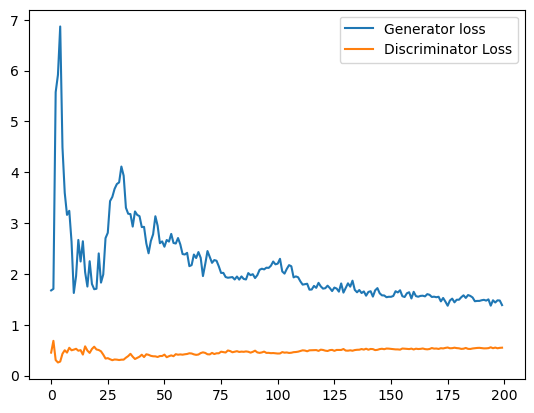

In [54]:
# plot and save the generator and discriminator loss
losses_g_n = [tensor.detach().numpy() for tensor in losses_g]
losses_d_n = [tensor.detach().numpy() for tensor in losses_d]
plt.figure()
plt.plot(losses_g_n, label='Generator loss')
plt.plot(losses_d_n, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')